## Les Séries Temporelles 

### Import Data

In [1]:
data = "../data_deep_learning/station.csv"

In [2]:
import pandas as pd
import numpy as np

/tmp/ipykernel_2970/2162656668.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df = pd.read_csv(data)

df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
0,1973,4.15,4.23,6.00,7.92,12.21,15.02,16.33,18.13,15.21,11.11,7.32,5.65,4.39,8.71,16.49,11.21,10.20
1,1974,7.08,6.11,6.75,9.16,11.01,14.34,15.85,16.62,13.36,8.38,8.43,8.61,6.28,8.97,15.60,10.06,10.23
2,1975,7.93,5.69,5.66,8.66,10.36,14.39,17.44,19.02,15.12,10.48,7.07,3.47,7.41,8.23,16.95,10.89,10.87
3,1976,5.70,4.87,5.95,7.98,13.13,17.35,19.05,18.04,15.13,12.02,7.54,3.41,4.68,9.02,18.15,11.56,10.85
4,1977,4.07,7.31,8.16,7.89,11.18,13.16,16.17,15.50,13.35,12.67,7.89,7.35,4.93,9.08,14.94,11.30,10.06


In [5]:
df.tail()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,D-J-F,M-A-M,J-J-A,S-O-N,metANN
46,2019,5.13,7.38,9.08,9.68,11.88,16.53,18.93,18.58,16.08,12.93,7.88,7.03,6.80,10.21,18.01,12.30,11.83
47,2020,6.83,8.33,7.88,12.13,13.03,16.18,17.78,19.98,16.88,12.18,9.88,6.89,7.40,11.01,17.98,12.98,12.34
48,2021,5.09,6.44,7.64,7.29,11.64,16.74,18.09,17.19,17.29,12.79,8.24,7.54,6.14,8.86,17.34,12.77,11.28
49,2022,5.69,7.54,9.19,9.84,14.19,16.94,19.69,19.94,16.29,15.09,10.44,5.00,6.92,11.07,18.86,13.94,12.70
50,2023,6.75,6.90,9.35,10.05,13.20,18.00,18.25,18.40,19.15,14.65,9.75,8.65,6.22,10.87,18.22,14.52,12.45


### Créer la Série Temporelles

In [7]:
temps = df.loc[:, "JAN": "DEC"]

In [13]:
series = []

for i, row in temps.iterrows():
    series = series + list(row)
    
print(series)

[4.15, 4.23, 6.0, 7.92, 12.21, 15.02, 16.33, 18.13, 15.21, 11.11, 7.32, 5.65, 7.08, 6.11, 6.75, 9.16, 11.01, 14.34, 15.85, 16.62, 13.36, 8.38, 8.43, 8.61, 7.93, 5.69, 5.66, 8.66, 10.36, 14.39, 17.44, 19.02, 15.12, 10.48, 7.07, 3.47, 5.7, 4.87, 5.95, 7.98, 13.13, 17.35, 19.05, 18.04, 15.13, 12.02, 7.54, 3.41, 4.07, 7.31, 8.16, 7.89, 11.18, 13.16, 16.17, 15.5, 13.35, 12.67, 7.89, 7.35, 4.2, 3.63, 7.51, 7.74, 11.48, 13.54, 15.49, 15.06, 14.52, 12.65, 9.08, 5.07, 0.35, 3.23, 6.09, 8.24, 10.66, 13.68, 16.41, 15.38, 14.27, 11.84, 8.06, 6.9, 1.84, 6.87, 5.71, 8.46, 11.03, 14.28, 15.34, 16.97, 15.32, 10.17, 6.39, 4.97, 5.39, 3.14, 9.4, 8.2, 11.6, 13.64, 15.96, 16.73, 14.87, 10.33, 8.33, 4.65, 4.51, 5.6, 6.03, 8.65, 12.96, 16.86, 17.19, 16.85, 16.3, 11.07, 8.6, 5.04, 7.04, 1.75, 6.48, 7.88, 11.15, 15.02, 19.92, 17.63, 15.97, 11.57, 8.07, 5.26, 5.72, 4.89, 5.8, 9.09, 9.7, 14.79, 17.98, 18.46, 15.06, 11.85, 9.52, 5.29, 0.56, 2.9, 5.49, 9.09, 11.46, 14.05, 17.42, 15.69, 15.61, 11.23, 4.93, 6.76, 5

In [14]:
len(series)

612

In [15]:
series = series[:-7]

In [16]:
len(series)

605

In [18]:
series = np.array(series)

series

array([ 4.150e+00,  4.230e+00,  6.000e+00,  7.920e+00,  1.221e+01,
        1.502e+01,  1.633e+01,  1.813e+01,  1.521e+01,  1.111e+01,
        7.320e+00,  5.650e+00,  7.080e+00,  6.110e+00,  6.750e+00,
        9.160e+00,  1.101e+01,  1.434e+01,  1.585e+01,  1.662e+01,
        1.336e+01,  8.380e+00,  8.430e+00,  8.610e+00,  7.930e+00,
        5.690e+00,  5.660e+00,  8.660e+00,  1.036e+01,  1.439e+01,
        1.744e+01,  1.902e+01,  1.512e+01,  1.048e+01,  7.070e+00,
        3.470e+00,  5.700e+00,  4.870e+00,  5.950e+00,  7.980e+00,
        1.313e+01,  1.735e+01,  1.905e+01,  1.804e+01,  1.513e+01,
        1.202e+01,  7.540e+00,  3.410e+00,  4.070e+00,  7.310e+00,
        8.160e+00,  7.890e+00,  1.118e+01,  1.316e+01,  1.617e+01,
        1.550e+01,  1.335e+01,  1.267e+01,  7.890e+00,  7.350e+00,
        4.200e+00,  3.630e+00,  7.510e+00,  7.740e+00,  1.148e+01,
        1.354e+01,  1.549e+01,  1.506e+01,  1.452e+01,  1.265e+01,
        9.080e+00,  5.070e+00,  3.500e-01,  3.230e+00,  6.090e

In [19]:
series.shape

(605,)

### Data Visualization

In [20]:
import matplotlib.pyplot as plt

In [21]:
time = np.arange(len(series))

In [22]:
time

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

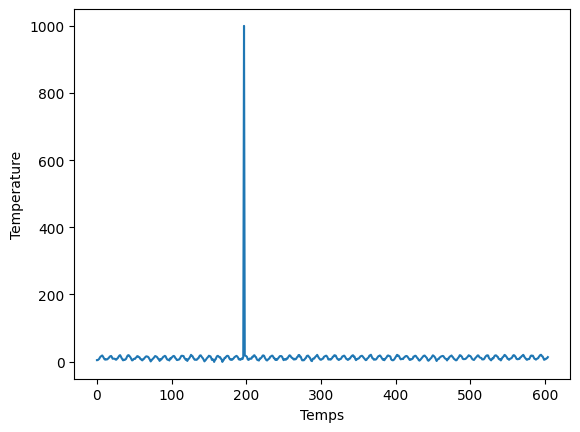

In [23]:
plt.plot(time, series)
plt.xlabel('Temps')
plt.ylabel('Temperature')
plt.show()

In [24]:
np.argmax(series)

197

In [25]:
series[197]

999.9

In [26]:
series[195: 199]

array([  7.42,  14.09, 999.9 ,  18.56])

In [30]:
(14.09+18.56)/2

16.325

In [31]:
series[197] = 16.325

In [32]:
series[197]

16.325

In [35]:
series.max()

20.28

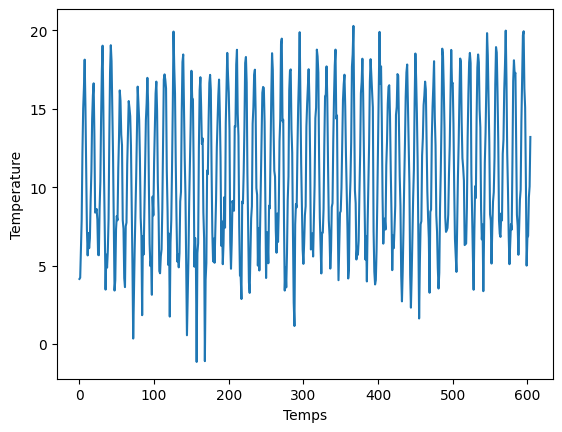

In [34]:
plt.plot(time, series)
plt.xlabel('Temps')
plt.ylabel('Temperature')
plt.show()

### BaseLine

In [36]:
# Train_test_split

time_train = time[:505]
x_train = series[:505]

time_test = time[505:]
x_test = series[505:]

In [38]:
years = df['YEAR'].tolist()

In [39]:
505/12

42.083333333333336

In [40]:
years[43]  # 1973-2016 train, 2016-2023 test

2016

In [41]:
# Approche naive
pred_naive = series[504:-1]

In [42]:
pred_naive.shape

(100,)

In [44]:
from sklearn.metrics import mean_absolute_error

ModuleNotFoundError: No module named 'sklearn'